<a href="https://colab.research.google.com/github/zxcusel/zxcusel/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r'StudentPerformanceFactors.csv')

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
df['Sleep_Hours']

,Sleep_Hours
0,7
1,8
2,7
3,8
4,6
...,...
6602,7
6603,8
6604,6
6605,6


In [7]:
for h in range(25):
    for i, n in enumerate(df['Sleep_Hours']):
        if n == h:
            print(i, n)
            break

28 4
20 5
4 6
0 7
1 8
18 9
16 10


In [8]:
hours = {i:0 for i in range(25)}
for h in hours:
    for n in df['Sleep_Hours']:
        if n == h:
            hours[h] += 1
hours = {k:hours[k] for k in hours if hours[k] != 0}
hours

{4: 309, 5: 695, 6: 1376, 7: 1741, 8: 1399, 9: 775, 10: 312}

In [9]:
hours_p = {k:hours[k]/len(df['Sleep_Hours']) for k in hours}
hours_p

{4: 0.046768578780081733,
 5: 0.10519146359921296,
 6: 0.20826396246405326,
 7: 0.2635084001816255,
 8: 0.21174511881337976,
 9: 0.11729983350991373,
 10: 0.04722264265173301}

In [11]:
heometry_hours = {h:{} for h in hours_p}
for h in hours_p:
    q = 1 - hours_p[h]
    p = hours_p[h]
    # print(h)
    heometry_hours[h] = {i:q**(i-1)*p for i in range(1, 11)}
    # for i in range(1, 11):
    #     heometry_hours[h]({i:q**(i-1)*p})
        # print(f'try {i}:  {q**(i-1)*p}')
heometry_hours

{4: {1: 0.046768578780081733,
  2: 0.044581278818973016,
  3: 0.042496275768411085,
  4: 0.040508785347276074,
  5: 0.03861424702847657,
  6: 0.03680831357429173,
  7: 0.03508684106113051,
  8: 0.03344587937081882,
  9: 0.031881663126595565,
  10: 0.03039060305301935},
 5: {1: 0.10519146359921296,
  2: 0.09412621958506841,
  3: 0.08422494478385417,
  4: 0.07536519957047766,
  5: 0.06743742392321232,
  6: 0.06034358259936905,
  7: 0.05399595282692143,
  8: 0.0483160395206235,
  9: 0.04323360460813169,
  10: 0.038685798462732644},
 6: {1: 0.20826396246405326,
  2: 0.16489008440282468,
  3: 0.13054942205406025,
  4: 0.1033606821196896,
  5: 0.08183437689845563,
  6: 0.06479122529980648,
  7: 0.05129754798596757,
  8: 0.040614117377720055,
  9: 0.03215566036065591,
  10: 0.025458795118297427},
 7: {1: 0.2635084001816255,
  2: 0.19407172321534583,
  3: 0.1429321939103788,
  4: 0.10526836015860504,
  5: 0.07752926298346786,
  6: 0.05709965092743373,
  7: 0.0420534132606164,
  8: 0.0309719856

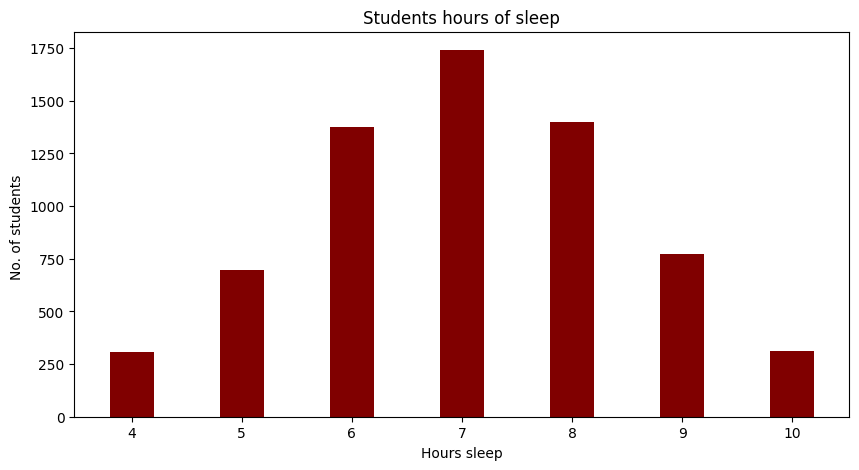

In [12]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(hours.keys(), hours.values(), color ='maroon',
        width = 0.4)

plt.xlabel("Hours sleep")
plt.ylabel("No. of students ")
plt.title("Students hours of sleep")
plt.show()

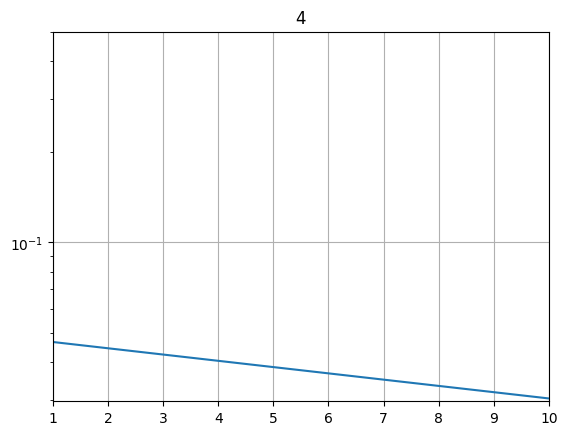

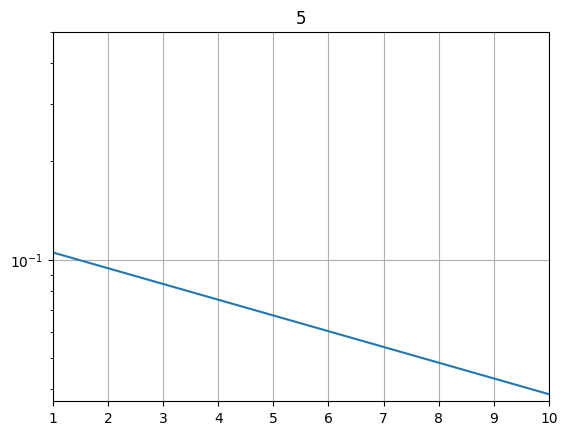

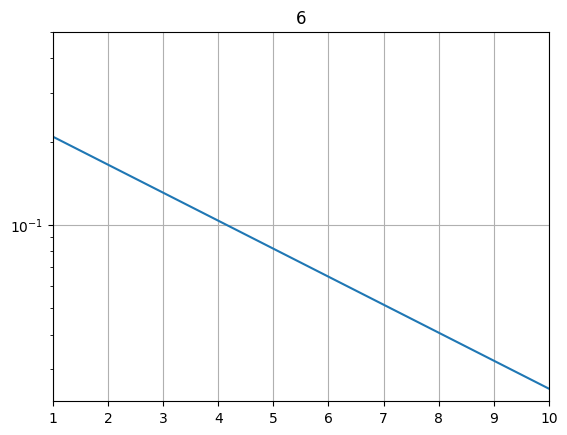

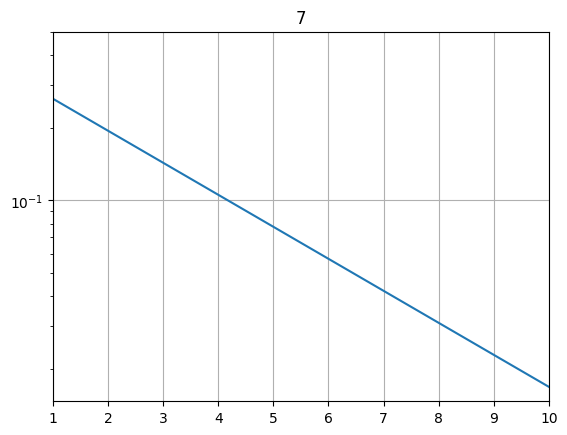

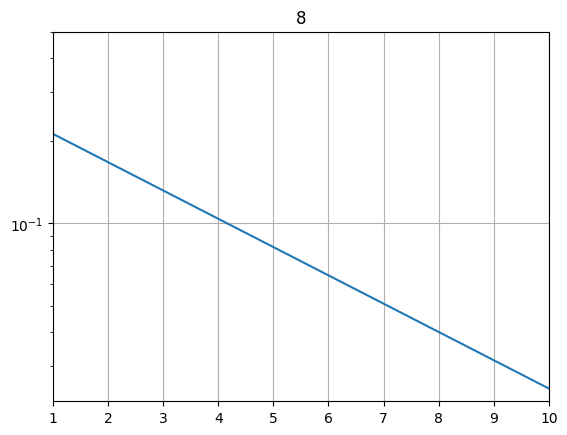

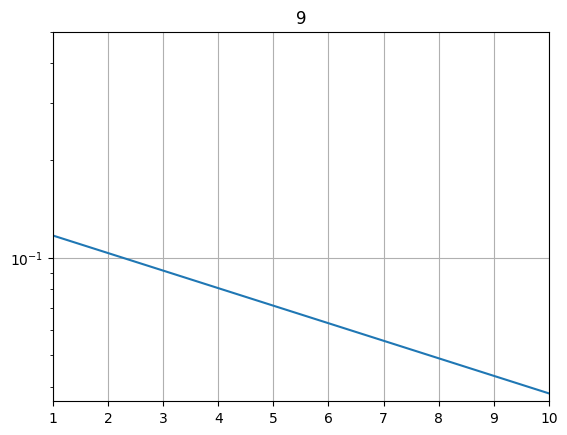

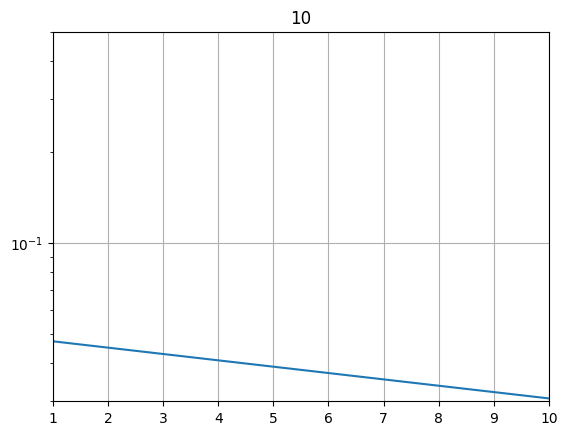

In [13]:
for h, d in heometry_hours.items():
    figure, axes = plt.subplots()

    # creating the bar plot
    # plt.bar(h, k, color ='maroon',
    #         width = 0.4)

    # plt.xlabel("try")
    # plt.ylabel("p")
    # plt.title("Students hours of sleep")
    # plt.show()
    axes.semilogy(d.keys(), d.values())

    axes.set_xlim(min(d.keys()), max(d.keys()))
    axes.set_ylim(None, 0.5)
    axes.grid()
    plt.title(h)
    plt.show()